In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from matplotlib import pyplot as plt
import torch

from grconvnet._orig.utils.visualisation.plot import plot_results

from grconvnet.preprocessing import RebuildLegacyPreprocessor, LegacyPreprocessor
from grconvnet.dataloading import CornellDataset
from grconvnet.postprocessing import LegacyPostprocessor
from grconvnet.utils.processing import End2EndProcessor
from grconvnet.utils.export import Exporter

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
dataset_path = Path("/home/moritz/Documents/cornell")
dataset = CornellDataset(dataset_path)
sample = dataset[745]

In [3]:
e2e_processor = End2EndProcessor(
    preprocessor = RebuildLegacyPreprocessor(),
    postprocessor = LegacyPostprocessor(),
)

In [4]:
process_data = e2e_processor([sample])[0]
print(list(process_data.keys()))
print(list(process_data["preprocessor"].keys()))
print(list(process_data["postprocessor"].keys()))

['preprocessor', 'postprocessor', 'img2world_converter', 'model_input', 'sample', 'grasps_img', 'grasps_world']
['rgb_cropped', 'depth_cropped', 'seg_cropped', 'rgb_masked', 'rgb_norm', 'depth_norm']
['q_img', 'angle_img', 'width_img']


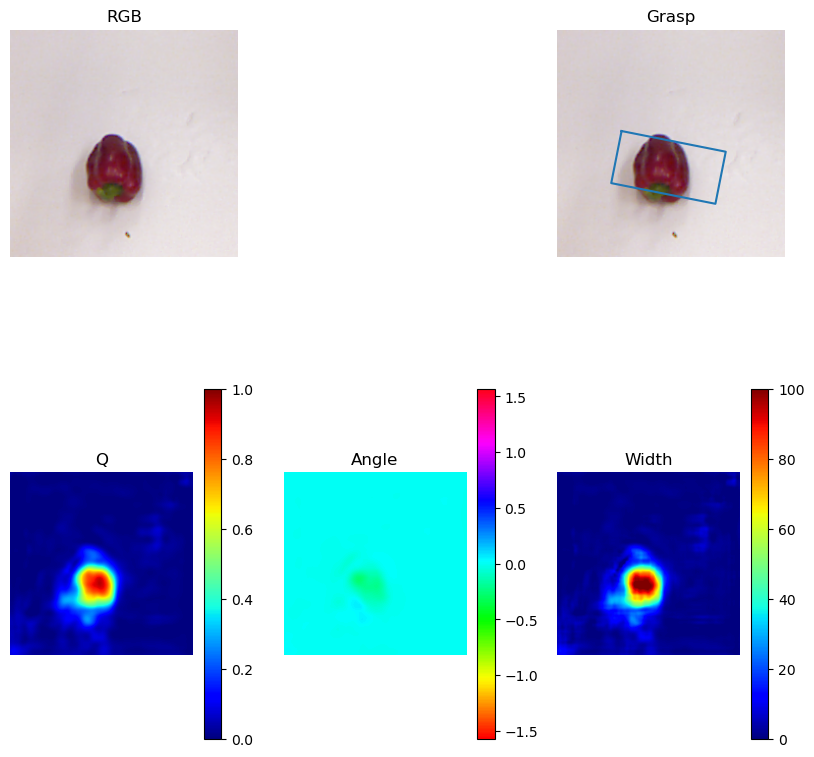

In [5]:
fig = plt.figure(figsize=(10, 10))

plot_results(fig=fig,
    rgb_img=process_data["preprocessor"]["rgb_cropped"].astype("uint8"),
    grasp_q_img=process_data["postprocessor"]["q_img"],
    grasp_angle_img=process_data["postprocessor"]["angle_img"],
    no_grasps=2,
    grasp_width_img=process_data["postprocessor"]["width_img"])

In [6]:
export_data = {
    "rgb_cropped": process_data["preprocessor"]["rgb_cropped"],
    "depth_cropped": process_data["preprocessor"]["depth_cropped"],
    "rgb_masked": process_data["preprocessor"]["rgb_masked"],
    "q_img": process_data["postprocessor"]["q_img"],
    "angle_img": process_data["postprocessor"]["angle_img"],
    "width_img": process_data["postprocessor"]["width_img"],
    "grasps_img": process_data["grasps_img"],
    "grasps_world": process_data["grasps_world"],
    "model_input": process_data["model_input"],
    "overview": fig,
}

exporter = Exporter(export_dir=Path.cwd().parent / "grconvnet" / "results" / "test")
export_path = exporter(export_data, f"01_processing_orig_{process_data['sample'].name}")